In [ ]:
import numpy as np

# Q1

In [ ]:
def element_wise_comparison(array1, array2):
    """
    Perform element-wise comparisons between two NumPy arrays.

    Parameters:
    - array1 (numpy.ndarray): First input NumPy array.
    - array2 (numpy.ndarray): Second input NumPy array.

    Returns:
    - tuple: A tuple of NumPy arrays containing the following element-wise comparison results:
        - greater_result (numpy.ndarray): Element-wise greater than comparison.
        - greater_equal_result (numpy.ndarray): Element-wise greater than or equal to comparison.
        - less_result (numpy.ndarray): Element-wise less than comparison.
        - less_equal_result (numpy.ndarray): Element-wise less than or equal to comparison.
    """

    greater_result = np.greater(array1, array2)
    greater_equal_result = np.greater_equal(array1, array2)
    less_result = np.less(array1, array2)
    less_equal_result = np.less_equal(array1, array2)

    return greater_result, greater_equal_result, less_result, less_equal_result

In [ ]:
array1 = np.array([[1, 2], [3, 4]])
array2 = np.array([[1, 2], [2, 3]])

greater, greater_equal, less, less_equal = element_wise_comparison(array1, array2)

print("Greater than:")
print(greater)
print("\nGreater than or equal to:")
print(greater_equal)
print("\nLess than:")
print(less)
print("\nLess than or equal to:")
print(less_equal)

Greater than:
[[False False]
 [ True  True]]

Greater than or equal to:
[[ True  True]
 [ True  True]]

Less than:
[[False False]
 [False False]]

Less than or equal to:
[[ True  True]
 [False False]]


# Q2

In [ ]:
def array_multiply(array1, array2, method="element-wise"):
    """
    Perform multiplication between two NumPy arrays using the specified method.

    Parameters:
    - array1 (numpy.ndarray): First input NumPy array.
    - array2 (numpy.ndarray): Second input NumPy array.
    - method (str, optional): The multiplication method to use. Defaults to "element-wise".

    Returns:
    - numpy.ndarray: The result of the multiplication operation based on the chosen method.
    """

    result = None
    if method == "element-wise":
      result = array1 * array2
    elif method == "matrix-multiply":
      result = np.dot(array1, array2)

    return result

In [ ]:
array1 = np.array([[1, 2], [3, 4]])
array2 = np.array([[2, 0], [1, 2]])

# Perform element-wise multiplication
element_wise_result = array_multiply(array1, array2, method="element-wise")
print("Element-wise multiplication:")
print(element_wise_result)

# Perform matrix multiplication
matrix_multiply_result = array_multiply(array1, array2, method="matrix-multiply")
print("\nMatrix multiplication:")
print(matrix_multiply_result)

Element-wise multiplication:
[[2 0]
 [3 8]]

Matrix multiplication:
[[ 4  4]
 [10  8]]


# Q3

In [ ]:
def broadcast_add(p, q, method="row-wise"):
    """
    Perform addition between two NumPy arrays using broadcasting and the specified method.

    Parameters:
    - p (numpy.ndarray): First input NumPy array.
    - q (numpy.ndarray): Second input NumPy array.
    - method (str, optional): The addition method to use. Defaults to "row-wise".
        - "row-wise": Perform row-wise addition, broadcasting q to match the number of rows in p.
        - "column-wise": Perform column-wise addition, adding q to each column of p.

    Returns:
    - numpy.ndarray: The result of the addition operation based on the chosen method.

    Raises:
    - ValueError: If an invalid method is provided or if the shapes are incompatible for the chosen method.
    """
    result = None

    if method == "row-wise":
        extended_q = np.tile(q, (p.shape[0], 1))
        result = p + extended_q
    elif method == "column-wise":
      extended_q = np.tile(q, (p.shape[1], 1)).T
      result = p + extended_q

    return result

In [ ]:
# Example usage with different-shaped arrays
p = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
q = np.array([10, 20, 30])

# Add q row-wise to p
row_wise_result = broadcast_add(p, q, method="row-wise")
print("Row-wise addition:")
print(row_wise_result)

# Add q column-wise to p
column_wise_result = broadcast_add(p, q, method="column-wise")
print("\nColumn-wise addition:")
print(column_wise_result)

Row-wise addition:
[[11 22 33]
 [14 25 36]
 [17 28 39]]

Column-wise addition:
[[11 12 13]
 [24 25 26]
 [37 38 39]]


# Q4

In [ ]:
# Initialize the random matrix
np.random.seed(0)
x = np.random.randint(1, 10, (4, 4))

print("Original Array:")
print(x)

# Do the normalization
min_val = x.min()
max_val = x.max()
x = (x - min_val) / (max_val - min_val)

print("After normalization:")
print(x)

Original Array:
[[6 1 4 4]
 [8 4 6 3]
 [5 8 7 9]
 [9 2 7 8]]
After normalization:
[[0.625 0.    0.375 0.375]
 [0.875 0.375 0.625 0.25 ]
 [0.5   0.875 0.75  1.   ]
 [1.    0.125 0.75  0.875]]


# Q5

average return: 0.0005548260008486608
std_dev return: 0.009442945103460247


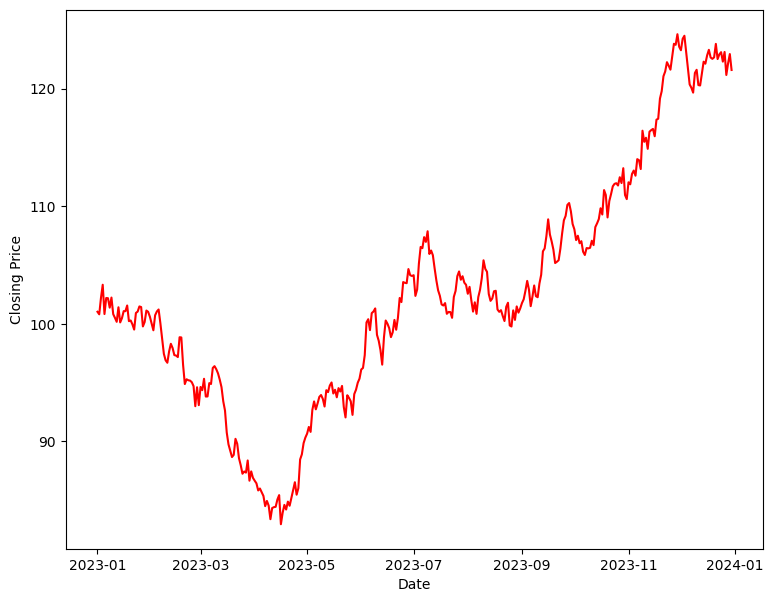

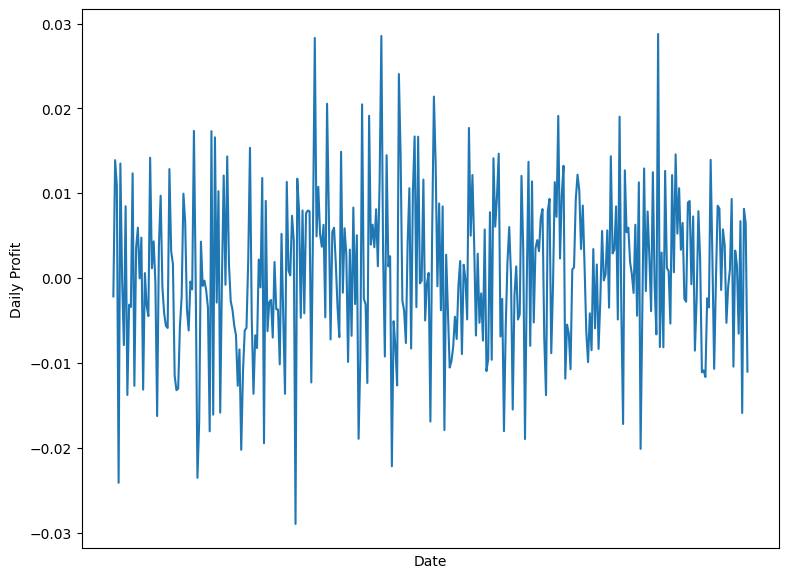


min randement occured on 4/16/2023 with value -0.028963574613605738
max randement occured on 11/9/2023 with value 0.02878633838810639

min price date and value:
2023-04-16 00:00:00
82.96821012

max price date and value:
2023-11-29 00:00:00
124.6180108


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# You should write your code here and print or plot the required data asked in homework documentation

# read csv file
data_frame = pd.read_csv('data.csv')

# get columns of data_frame
closing_price = data_frame.iloc[:, 1]
dates = data_frame.iloc[:, 0]


# Q5_1
Q5_1 = []
for i in range(1, data_frame.shape[0]):
    sub = (closing_price.iloc[i] - closing_price.iloc[i - 1]) / closing_price.iloc[i - 1]
    Q5_1.append(sub)

# Q5_2
Q5_2 = np.mean(Q5_1)
print(f"average return: {Q5_2}")

# Q5_3
Q5_3 = np.std(Q5_1)
print(f"std_dev return: {Q5_3}")

# Q5_4
data_frame['Date'] = pd.to_datetime(data_frame['Date'])
plt.figure(figsize=(9, 7))
plt.plot(data_frame['Date'], data_frame['Closing Price'], color='r')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

# Q5_5
plt.figure(figsize=(9, 7))
plt.plot(Q5_1);
plt.xticks([])
plt.xlabel('Date')
plt.ylabel('Daily Profit')
plt.show()

# Q5_6
min_randement_idx = np.argmin(Q5_1)
max_randement_idx = np.argmax(Q5_1)

min_randement_date = dates[min_randement_idx + 1]
max_randement_date = dates[max_randement_idx + 1]

print(f'\nmin randement occured on {min_randement_date} with value {Q5_1[min_randement_idx]}')
print(f'max randement occured on {max_randement_date} with value {Q5_1[max_randement_idx]}\n')


# Q5_7
min_price_idx = data_frame.iloc[:, 1].idxmin()
max_price_idx = data_frame.iloc[:, 1].idxmax()

min_date = data_frame.iloc[min_price_idx, 0]
min_value = data_frame.iloc[min_price_idx, 1]
max_date = data_frame.iloc[max_price_idx, 0]
max_value = data_frame.iloc[max_price_idx, 1]

print("min price date and value:")
print(min_date)
print(min_value)
print("\nmax price date and value:")
print(max_date)
print(max_value)




# Q6

In [ ]:
def for_loop_feed_forward(X, w):
    """
    Perform a feed-forward operation using a for loop.

    Parameters:
    - X (numpy.ndarray): Input data matrix of shape (num_samples, num_features).
    - w (numpy.ndarray): Weight matrix of shape (num_features, 1).

    Returns:
    - numpy.ndarray: Output matrix of shape (num_samples, 1).
    """
    # ------------
    # FILL THIS IN
    # ------------
    X_shape = X.shape[0]
    outputs = np.zeros((X_shape, 1))
    for i in range(X_shape):
        outputs[i] = np.dot(X[i], w)
    return outputs


def vectorized_feed_forward(X, w):
    """
    Perform a feed-forward operation using vectorization.

    Parameters:
    - X (numpy.ndarray): Input data matrix of shape (num_samples, num_features).
    - w (numpy.ndarray): Weight matrix of shape (num_features, 1).

    Returns:
    - numpy.ndarray: Output matrix of shape (num_samples, 1).
    """

    return np.dot(X, w)

In [ ]:
import time

# generate random samples
X = np.random.rand(1000, 500)
w = np.random.rand(500, 1)

start_time = time.time()
outputs = for_loop_feed_forward(X, w)

print("Time spent on calculating the outputs using for loops: ")
print(time.time() - start_time)

start_time = time.time()
outputs = vectorized_feed_forward(X, w)

print("Time spent on calculating the outputs using vectorization: ")
print(time.time() - start_time)

Time spent on calculating the outputs using for loops: 
0.007358074188232422
Time spent on calculating the outputs using vectorization: 
0.0012619495391845703


# Q7

In [ ]:
def replace_elements_above_threshold(array, threshold):
    """
    Replace elements in a NumPy array that are higher than the given threshold with a specified value.

    Parameters:
    - array (numpy.ndarray): Input NumPy array.
    - threshold (float): Threshold value to compare elements with.

    Returns:
    - numpy.ndarray: NumPy array with elements replaced above the threshold.
    """

    modified_arr = (array > threshold).astype(int)

    return modified_arr

In [ ]:
input_array = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
threshold_value = 5
result_array = replace_elements_above_threshold(input_array, threshold_value)
print(result_array)

[[0 0 0]
 [0 0 1]
 [1 1 1]]


# Q8

In [7]:
class Matrix:
    def __init__(self, matrix):
        """
        Initialize a Matrix object with a given list of lists.

        Parameters:
        - matrix (list of lists): Input list of lists representing the matrix.
        """
        self.matrix = matrix
        self.rows, self.cols = len(matrix), len(matrix[0])

    def is_equal(self, second_matrix):
        """
        Check if this Matrix object is equal to another Matrix object.

        Parameters:
        - second_matrix (Matrix): Another Matrix object for comparison.

        Returns:
        - bool: True if the matrices are equal, False otherwise.
        """

        if (self.rows != second_matrix.rows):
            return False
        if (self.cols != second_matrix.cols):
            return False

        for i in range(self.rows):
            for j in range(self.cols):
                if self.matrix[i][j] != second_matrix.matrix[i][j]:
                    return False
        return True

    def is_higher_elementwise(self, second_matrix):
        """
        Check if this Matrix object has higher values element-wise compared to
        another Matrix object.

        Parameters:
        - second_matrix (Matrix): Another Matrix object for comparison.

        Returns:
        - Matrix: Matrix same shape of the input.
        """
        result_matrix = [[-1 for _ in range(self.cols)] for _ in range(self.rows)]

        for i in range(self.rows):
            for j in range(self.cols):
                if self.matrix[i][j] > second_matrix.matrix[i][j]:
                    result_matrix[i][j] = 1
                else:
                    result_matrix[i][j] = 0

        return result_matrix

    def is_subset(self, second_matrix):
        """
        Check if this Matrix object is a subset of another Matrix object.

        Parameters:
        - second_matrix (Matrix): Another Matrix object for comparison.

        Returns:
        - bool: True if this matrix is a subset of 'second_matrix', False
        otherwise.
        """

        subsets = []
        subset = [[0 for _ in range(second_matrix.cols)] for _ in range(second_matrix.rows)]

        for i in range(self.rows - second_matrix.rows + 1):
            for j in range(self.cols - second_matrix.cols + 1):
                subset = [row[j : j + second_matrix.cols] for row in self.matrix[i : i + second_matrix.rows]]
                subsets.append(subset)

        for subset in subsets:
            if second_matrix.is_equal(Matrix(subset)):
                return True
        return False

    def dot_product(self, second_matrix):
      """
      Calculate the dot product between this Matrix object and another Matrix object.

      Parameters:
      - second_matrix (Matrix): Another Matrix object for the dot product.

      Returns:
      - Matrix: The result of the dot product as a numpy.ndarray.
      """

      result_matrix = [[0 for _ in range(self.cols)] for _ in range(self.rows)]

      for i in range(self.rows):
        for j in range(second_matrix.cols):
          for k in range(self.cols):
            result_matrix[i][j] += self.matrix[i][k] * second_matrix.matrix[k][j]

      return result_matrix



In [8]:
matrix1 = Matrix([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
matrix2 = Matrix([[0, 0, 0], [4, 5, 6], [7, 8, 9]])

# test equality of matrices here and show the result #
print(matrix1.is_equal(matrix2))



False


In [9]:
matrix1 = Matrix([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
matrix2 = Matrix([[0, 0, 0], [4, 5, 6], [7, 8, 9]])
matrix3 = Matrix([[0, 0, 0], [10, 20, 30], [-1, 8, 10]])

# test proportion of matrices here and show the result #
print(f'{matrix1.is_higher_elementwise(matrix3)}\n')
print(matrix2.is_higher_elementwise(matrix3))



[[1, 1, 1], [0, 0, 0], [1, 0, 0]]

[[0, 0, 0], [0, 0, 0], [1, 0, 0]]


In [ ]:
matrix1 = Matrix([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
matrix4 = Matrix([[5, 6], [8, 9]])
matrix5 = Matrix([[1, 2], [4, 5]])
matrix6 = Matrix([[1, 2], [3, 4]])

# test subset of matrices here and show the result #
print(matrix1.is_subset(matrix4))
print(matrix1.is_subset(matrix5))
print(matrix1.is_subset(matrix6))



True
True
False


In [ ]:
matrix7 = Matrix([[3, 1], [2, 4], [-1, 5]])
matrix8 = Matrix([[3, 1], [2, 4]])

# test product of matrices here and show the result #
print(matrix7.dot_product(matrix8))

[[11, 7], [14, 18], [7, 19]]
